# **Applied Data Science, the Capstone**

Author: Fernando M. Delgado Chaves

## **Week 4. Capstone Project - The Battle of Neighborhoods:**
## **Opening a new pharmacy in the Seville, Spain metropolitan area**


## **1. Introduction**

The present project is the final assignment of the Capstone, the very last course of the series of 9 courses composing the IBM Data Science Professional Certificate.

### Description of the problem and a discussion of the background

The primary objective of the pharmaceutical industry is to research, discover and develop new medicines that can improve the health and quality of life of people who suffer from a health problem. But, at the same time, the sector has become one of the main drivers of the economy in countries with established pharmaceutical companies, such as Spain, where it is the industrial sector that invests the most in R&D, being responsible for one out of every five euros spent in this strategic area for any developed economy.

A key factor is that the pharmaceutical sector is distinguished by its tractive effects on other sectors of the economy, something that is especially revealing in the area of employment generation. Thus, the pharmaceutical industry generates direct jobs all around the globe, including professionals with university studies, and is the high technology sector with the most employment.

#### Business problem: 
Opening a new pharmacy, also known as chemist or drugstore, is a high-risk investment that involves strategic decision making. New stores are required to satisfy the needs of communities with not so many facilities available. Usually, pharmacies are positioned at even distances so they become accessible to a large number of individuals, according to a population criterion. 

In addition, it is to be considered that whether a pharmacy is close to a Doctor's office or hospital it will be more likely to be visited by patients after their medical appointment. Analogously, gyms or sport centers often reccommend food supplies and other fitness protein which are provided in pharmacies. 

For the sake of simplicity, the following aspects will be taken into consdieration for selecting an appropriate place to open a new pharmacy:
* Demand for pharmacies and medicinal products
* Closeness to hospitals or medical offices
* Closeness to gyms or sport centers

#### Target audience:
The main target audience for this project will be developers and investors in the Seville, Spain metropolitan area. It is useful for chemists and pharmaceutical companies who want to open a new pharmacy in Seville, as well as for drug providers who are interested in new sales. 

### Description of the data and how it will be used to solve the problem.

In this project geospatial information of the metropolitan area of Seville, Spain will be selected in order to open a new pharmacy. This data was retrieved from the Foursquare API, which includes tjhe location of an area and its facilities, including the location of other pharmacies, hospitals, medical offices and other places of interest. The Python Folium package was used to plot such information on a map highlighting the facilities of each area. 

Based on the features of each area, the aim of this project is to determine a ranking of the best areas or neighborhoods to start a new pharmaceutical business.

## **2. Methodology**

First, geospatial information was retrieved for the spots of interest. The list of districts and neighborhoods of Seville were obtained from: https://urbansevilla.es/distritos-y-barrios-de-sevilla/ to be used as input for a geolocalization service. This list was submitted to Geocode in order to obtain the information on their latitude and longitude. Additionally, the Foursquare API was used to retrieve the list of hospitals in the city and other venues close to the different neighborhoods. 

Second, the different neighborhoods were analyzed and finally clustered in order to obtain the neighborhoods that present a low number of pharmacies but at the same time contain a large number of hospitals and gyms.

## **3. Results**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


### 3.1 Retrieve Geospatial information

The different neighborhoods in Seville were obtained from: https://urbansevilla.es/distritos-y-barrios-de-sevilla/ and formatted to a .csv file which I included in the GitHub repo.

In [2]:
# https://urbansevilla.es/distritos-y-barrios-de-sevilla/
df = pd.read_csv("Seville.csv", sep = ';', error_bad_lines=False)
df.head()

,District,Neighborhood
0,Bellavista – La Palmera,Bellavista
1,Bellavista – La Palmera,Heliópolis
2,Bellavista – La Palmera,Elcano-Los Bermejales
3,Bellavista – La Palmera,Sector Sur-La Palmera-Reina Mercedes
4,Bellavista – La Palmera,Pedro Salvador-Las Palmeritas


In [3]:
df['Address'] = df['Neighborhood'] + ', ' + df['District'] +  ', ' + 'Seville'
df.head()

,District,Neighborhood,Address
0,Bellavista – La Palmera,Bellavista,"Bellavista, Bellavista – La Palmera, Seville"
1,Bellavista – La Palmera,Heliópolis,"Heliópolis, Bellavista – La Palmera, Seville"
2,Bellavista – La Palmera,Elcano-Los Bermejales,"Elcano-Los Bermejales, Bellavista – La Palmera..."
3,Bellavista – La Palmera,Sector Sur-La Palmera-Reina Mercedes,"Sector Sur-La Palmera-Reina Mercedes, Bellavis..."
4,Bellavista – La Palmera,Pedro Salvador-Las Palmeritas,"Pedro Salvador-Las Palmeritas, Bellavista – La..."


In [4]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

# declare an empty list to store 
# latitude and longitude of values 
# of city column 
longitude = [] 
latitude = [] 

# function to find the coordinate 
# of a given city 
def findGeocode(city): 
	
	# try and catch is used to overcome 
	# the exception thrown by geolocator 
	# using geocodertimedout 
	try: 
		
		# Specify the user_agent as your 
		# app name it should not be none 
		geolocator = Nominatim(user_agent="your_app_name") 
		
		return geolocator.geocode(city) 
	
	except GeocoderTimedOut: 
		
		return findGeocode(city)	 

# each value from city column 
# will be fetched and sent to 
# function find_geocode 
for i in (df["Address"]): 
	
	if findGeocode(i) != None: 
		
		loc = findGeocode(i) 
		
		# coordinates returned from 
		# function is stored into 
		# two separate list 
		latitude.append(loc.latitude) 
		longitude.append(loc.longitude) 
	
	# if coordinate for a city not 
	# found, insert "NaN" indicating 
	# missing value 
	else: 
		latitude.append(np.nan) 
		longitude.append(np.nan) 


In [5]:
# now add this column to dataframe 
df["Longitude"] = longitude 
df["Latitude"] = latitude 

df.head()

,District,Neighborhood,Address,Longitude,Latitude
0,Bellavista – La Palmera,Bellavista,"Bellavista, Bellavista – La Palmera, Seville",-5.974072,37.344722
1,Bellavista – La Palmera,Heliópolis,"Heliópolis, Bellavista – La Palmera, Seville",-5.983839,37.354551
2,Bellavista – La Palmera,Elcano-Los Bermejales,"Elcano-Los Bermejales, Bellavista – La Palmera...",-5.979620,37.346070
3,Bellavista – La Palmera,Sector Sur-La Palmera-Reina Mercedes,"Sector Sur-La Palmera-Reina Mercedes, Bellavis...",-5.986303,37.359483
4,Bellavista – La Palmera,Pedro Salvador-Las Palmeritas,"Pedro Salvador-Las Palmeritas, Bellavista – La...",-5.976616,37.356237


In [6]:

print('The dataframe has {} districts and {} neighborhoods.'.format(
        len(df['District'].unique()),
        df.shape[0]
    )
)


The dataframe has 11 districts and 105 neighborhoods.


**Note:** For some external reason, the coordinates of some neighborhoods could not be retrieved, and thus were excluded from the analysis. 

In [7]:
df = df.dropna()

print('The dataframe has {} districts and {} neighborhoods.'.format(
        len(df['District'].unique()),
        df.shape[0]
    )
)

The dataframe has 10 districts and 85 neighborhoods.


In [8]:
address = 'Seville, SP'

geolocator = Nominatim(user_agent="SVQ_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seville are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seville are 37.3886303, -5.9953403.


In [9]:

# create map of Seville using latitude and longitude values
map_Seville = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['District'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Seville)  
    
map_Seville

Foursquare API was used to retrieve data specifically corresponding to medical centers

In [10]:
# Define Foursquare Credentials and Version
LIMIT = 100

CLIENT_ID = 'U0ITN2U1TA5US5HTSKRDCRWDOVDGYZPE1PRHCEDQ2UMSRJHU' # your Foursquare ID
CLIENT_SECRET = 'JJDNQJJJPN4UG5KFE24DKNDIA3A1HT3KXLC5T2OWIRXSGB5M' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: U0ITN2U1TA5US5HTSKRDCRWDOVDGYZPE1PRHCEDQ2UMSRJHU
CLIENT_SECRET:JJDNQJJJPN4UG5KFE24DKNDIA3A1HT3KXLC5T2OWIRXSGB5M


In [11]:
search_query = 'Hospital'
radius = 1000000
print(search_query + ' .... OK!')

Hospital .... OK!


In [12]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=U0ITN2U1TA5US5HTSKRDCRWDOVDGYZPE1PRHCEDQ2UMSRJHU&client_secret=JJDNQJJJPN4UG5KFE24DKNDIA3A1HT3KXLC5T2OWIRXSGB5M&ll=37.3886303,-5.9953403&v=20180605&query=Hospital&radius=1000000&limit=100'

In [13]:
results = requests.get(url).json()

In [14]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode,location.neighborhood,venuePage.id
0,4bfe8b07bf6576b004d3aeb8,Hospital Infanta Luisa,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1604227136,False,C. San Jacinto,37.381407,-6.008007,"[{'label': 'display', 'lat': 37.38140700440427...",1379,ES,Sevilla,Andalucía,España,"[C. San Jacinto, Sevilla Andalucía, España]",NaN,NaN,NaN,NaN
1,4b633f9af964a5206a6d2ae3,Hospital Universitario Virgen del Rocío,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1604227136,False,Torcuato Luca de Tena,37.361681,-5.980575,"[{'label': 'display', 'lat': 37.36168132735405...",3271,ES,Sevilla,Andalucía,España,"[Torcuato Luca de Tena (Av Manuel Siurot), 410...",Av Manuel Siurot,41013,NaN,NaN
2,4b4c0d62f964a520acad26e3,Hospital de la Caridad,"[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",v-1604227136,False,"c/ Temprado, 3",37.383941,-5.995579,NaN,522,ES,Sevilla,Andalucía,España,"[c/ Temprado, 3, 41001 Sevilla Andalucía, España]",NaN,41001,NaN,NaN
3,4f477335e4b0e4755ba5a248,Hospital Infantil Virgen del Rocio,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1604227136,False,C. Torcuato Luca de Tena,37.362282,-5.977214,"[{'label': 'display', 'lat': 37.36228249874136...",3342,ES,Sevilla,Andalucía,España,"[C. Torcuato Luca de Tena, 41013 Sevilla Andal...",NaN,41013,NaN,NaN
4,51c1aedc498e270662c0d662,Hospital Universitario Nuestra Señora De Valme,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1604227136,False,NaN,37.387402,-6.000019,"[{'label': 'display', 'lat': 37.38740239676638...",435,ES,NaN,NaN,España,[España],NaN,NaN,NaN,NaN


In [15]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered = dataframe_filtered[dataframe_filtered['categories'] == "Hospital"]
dataframe_filtered = dataframe_filtered[dataframe_filtered['city'] == "Sevilla"]
dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,crossStreet,postalCode,neighborhood,id
0,Hospital Infanta Luisa,Hospital,C. San Jacinto,37.381407,-6.008007,"[{'label': 'display', 'lat': 37.38140700440427...",1379,ES,Sevilla,Andalucía,España,"[C. San Jacinto, Sevilla Andalucía, España]",NaN,NaN,NaN,4bfe8b07bf6576b004d3aeb8
1,Hospital Universitario Virgen del Rocío,Hospital,Torcuato Luca de Tena,37.361681,-5.980575,"[{'label': 'display', 'lat': 37.36168132735405...",3271,ES,Sevilla,Andalucía,España,"[Torcuato Luca de Tena (Av Manuel Siurot), 410...",Av Manuel Siurot,41013,NaN,4b633f9af964a5206a6d2ae3
3,Hospital Infantil Virgen del Rocio,Hospital,C. Torcuato Luca de Tena,37.362282,-5.977214,"[{'label': 'display', 'lat': 37.36228249874136...",3342,ES,Sevilla,Andalucía,España,"[C. Torcuato Luca de Tena, 41013 Sevilla Andal...",NaN,41013,NaN,4f477335e4b0e4755ba5a248
8,Hospital de Rehabilitación y Traumatología,Hospital,Hospital Universitario Virgen del Rocío,37.361753,-5.979217,"[{'label': 'display', 'lat': 37.36175270138356...",3314,ES,Sevilla,Andalucía,España,[Hospital Universitario Virgen del Rocío (Av M...,Av Manuel Siurot,41013,NaN,4ec23b6d8231b62f436ff0e1
12,Hospital Viamed Santa Ángela de la Cruz,Hospital,Av. de Jerez 59,37.327633,-5.965702,"[{'label': 'display', 'lat': 37.32763253045338...",7279,ES,Sevilla,Andalucía,España,"[Av. de Jerez 59, 41014 Sevilla Andalucía, Esp...",NaN,41014,NaN,4cc1b300d363721e79c65bc9
14,Hospital Victoria Eugenia - Cruz Roja Sevilla,Hospital,"Av. Cruz Roja, 1",37.400308,-5.982718,"[{'label': 'display', 'lat': 37.40030781648197...",1713,ES,Sevilla,Andalucía,España,"[Av. Cruz Roja, 1 (Ronda de Capuchinos), 41009...",Ronda de Capuchinos,41009,NaN,4d52a64bbd6ff04de21ffe0c
15,Hospital Santa Isabel,Hospital,C/Luis Montoto,37.386857,-5.975262,"[{'label': 'display', 'lat': 37.38685675953093...",1786,ES,Sevilla,Andalucía,España,"[C/Luis Montoto, Sevilla Andalucía, España]",NaN,NaN,NaN,505c55c3e4b02c16f276f94b
17,Hospital Regional Virgen Macarena,Hospital,Avda. Dr. Fedriani 3,37.407304,-5.986725,"[{'label': 'display', 'lat': 37.40730420485541...",2213,ES,Sevilla,Andalucía,España,"[Avda. Dr. Fedriani 3, Sevilla Andalucía, España]",NaN,NaN,NaN,56b9d4a8498e45409a0bb0b9
21,Hospital San Juan de Dios,Hospital,"Eduardo Dato, 42",37.381445,-5.969181,"[{'label': 'display', 'lat': 37.38144546987284...",2448,ES,Sevilla,Andalucía,España,"[Eduardo Dato, 42, 41005 Sevilla Andalucía, Es...",NaN,41005,NaN,4d7bd763e04d6ea86d1df0d5
22,Hospital Duques del Infantado,Hospital,"C. Sor Gregoria de Sta. Teresa, s/n",37.363113,-5.987520,"[{'label': 'display', 'lat': 37.36311266838571...",2923,ES,Sevilla,Andalucía,España,"[C. Sor Gregoria de Sta. Teresa, s/n, Sevilla ...",NaN,NaN,Heliopo,4d95a0cd0caaa14307d261b3


Visualize the Hospitals in the city

In [16]:
hospital_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the City center
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='City center',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hospital_map)

# add the Hospitals as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hospital_map)

# display map
hospital_map

I will know use the Foursquare API to retrieve venues data

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
Sevilla_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Bellavista
Heliópolis
Elcano-Los Bermejales
Sector Sur-La Palmera-Reina Mercedes
Pedro Salvador-Las Palmeritas
Barriada de Pineda
El Arenal
Encarnación-Regina
Alfalfa
San Bartolomé
San Lorenzo
San Gil
Museo
Santa Catalina
San Julián
San Vicente
Amate
Juan XXIII
Los Pájaros
Rochelambert
Santa Aurelia – Cantábrico – Atlántico – La Romería
Palmete
El Cerro
La Plata
Torreblanca
Tablada
Los Remedios
Santa María de Ordas-San Nicolás
Pío XII
La Barzola
El Carmen
Cruz Roja-Capuchinos
Villegas
Los Príncipes-La Fontanilla
Begoña-Santa Catalina
Polígono Norte
La Paz-Las Golondrinas
La Palmilla-Doctor Marañón
Hermandades-La Carrasca
Macarena 3 Huertas-Macarena 5
El Torrejón
El Cerezo
Doctor Barraquer-Grupo Renfe-Policlínico
Retiro Obrero
Cisneo Alto-Santa María de Gracia
Campos de Soria
León XIII-Los Naranjos
El Rocío
Pino Flores
Las Avenidas
Nervión
San Bernardo
Huerta del Pilar
La Florida
La Buhaira
La Calzada
San Roque
Ciudad Jardín
Consolación
El Gordillo
Las Almenas
San Jerónimo
La Bachillera

In [19]:
print(Sevilla_venues.shape)
Sevilla_venues.head()

(1916, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bellavista,37.344722,-5.974072,Helarte,37.346009,-5.977549,Ice Cream Shop
1,Bellavista,37.344722,-5.974072,Ignacio Vidal,37.343917,-5.977493,Restaurant
2,Bellavista,37.344722,-5.974072,La Tasca del Pintor,37.343918,-5.977893,Tapas Restaurant
3,Bellavista,37.344722,-5.974072,Cervecería Huracán,37.345952,-5.978268,Bar
4,Bellavista,37.344722,-5.974072,Don Matteo (Tapas & Pizzas),37.343981,-5.976766,Pizza Place


The list of Hospitals that was previously retrieved was added to this venues list. For this, first asssign each hospital venue to its corresponding neighborhood.

In [20]:
dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,crossStreet,postalCode,neighborhood,id
0,Hospital Infanta Luisa,Hospital,C. San Jacinto,37.381407,-6.008007,"[{'label': 'display', 'lat': 37.38140700440427...",1379,ES,Sevilla,Andalucía,España,"[C. San Jacinto, Sevilla Andalucía, España]",NaN,NaN,NaN,4bfe8b07bf6576b004d3aeb8
1,Hospital Universitario Virgen del Rocío,Hospital,Torcuato Luca de Tena,37.361681,-5.980575,"[{'label': 'display', 'lat': 37.36168132735405...",3271,ES,Sevilla,Andalucía,España,"[Torcuato Luca de Tena (Av Manuel Siurot), 410...",Av Manuel Siurot,41013,NaN,4b633f9af964a5206a6d2ae3
3,Hospital Infantil Virgen del Rocio,Hospital,C. Torcuato Luca de Tena,37.362282,-5.977214,"[{'label': 'display', 'lat': 37.36228249874136...",3342,ES,Sevilla,Andalucía,España,"[C. Torcuato Luca de Tena, 41013 Sevilla Andal...",NaN,41013,NaN,4f477335e4b0e4755ba5a248
8,Hospital de Rehabilitación y Traumatología,Hospital,Hospital Universitario Virgen del Rocío,37.361753,-5.979217,"[{'label': 'display', 'lat': 37.36175270138356...",3314,ES,Sevilla,Andalucía,España,[Hospital Universitario Virgen del Rocío (Av M...,Av Manuel Siurot,41013,NaN,4ec23b6d8231b62f436ff0e1
12,Hospital Viamed Santa Ángela de la Cruz,Hospital,Av. de Jerez 59,37.327633,-5.965702,"[{'label': 'display', 'lat': 37.32763253045338...",7279,ES,Sevilla,Andalucía,España,"[Av. de Jerez 59, 41014 Sevilla Andalucía, Esp...",NaN,41014,NaN,4cc1b300d363721e79c65bc9


In [22]:

new_df = pd.DataFrame(columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])
    

for index, row in dataframe_filtered.iterrows():
    min = 1

    for index2, row2 in Sevilla_venues.iterrows():
        dif = ((row2["Neighborhood Latitude"] - row["lat"])**2 + (row2["Neighborhood Longitude"] - row["lng"])**2)**0.5
        
        if dif < min:
            min = dif
            min_df=pd.DataFrame({"Neighborhood": row2["Neighborhood"],
                "Neighborhood Latitude": row2["Neighborhood Latitude"],
                "Neighborhood Longitude": row2["Neighborhood Longitude"],
                "Venue": row["name"],
                "Venue Latitude": row["lat"],
                "Venue Longitude": row["lng"],
                "Venue Category": "Hospital"}, index=[0])
                
    new_df = new_df.append(min_df)

In [23]:
new_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,El Tardón-El Carmen,37.378366,-6.010520,Hospital Infanta Luisa,37.381407,-6.008007,Hospital
0,Tabladilla-La Estrella,37.364835,-5.980133,Hospital Universitario Virgen del Rocío,37.361681,-5.980575,Hospital
0,Bami,37.359389,-5.977465,Hospital Infantil Virgen del Rocio,37.362282,-5.977214,Hospital
0,Bami,37.359389,-5.977465,Hospital de Rehabilitación y Traumatología,37.361753,-5.979217,Hospital
0,Bellavista,37.344722,-5.974072,Hospital Viamed Santa Ángela de la Cruz,37.327633,-5.965702,Hospital
0,Cruz Roja-Capuchinos,37.400404,-5.980594,Hospital Victoria Eugenia - Cruz Roja Sevilla,37.400308,-5.982718,Hospital
0,Huerta del Pilar,37.385534,-5.977757,Hospital Santa Isabel,37.386857,-5.975262,Hospital
0,La Palmilla-Doctor Marañón,37.408322,-5.986648,Hospital Regional Virgen Macarena,37.407304,-5.986725,Hospital
0,Nervión,37.382999,-5.973981,Hospital San Juan de Dios,37.381445,-5.969181,Hospital
0,Sector Sur-La Palmera-Reina Mercedes,37.359483,-5.986303,Hospital Duques del Infantado,37.363113,-5.987520,Hospital


Let's add the hospitals to the Sevilla_venues table, now it has the correct format

In [24]:
Sevilla_venues = Sevilla_venues.append(new_df)

Let's check how many venues were returned for each neighborhood

In [25]:
Sevilla_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aeropuerto Viejo,1,1,1,1,1,1
Alfalfa,100,100,100,100,100,100
Amate,5,5,5,5,5,5
Bami,11,11,11,11,11,11
Barriada de Pineda,4,4,4,4,4,4
Barrio León,22,22,22,22,22,22
Begoña-Santa Catalina,4,4,4,4,4,4
Bellavista,20,20,20,20,20,20
Campos de Soria,6,6,6,6,6,6


Find out how many unique categories can be curated from all the returned venues

In [26]:
print('There are {} uniques categories.'.format(len(Sevilla_venues['Venue Category'].unique())))

There are 161 uniques categories.


### 3.2 Analysis of each neighborhood

In [27]:
# one hot encoding
sevilla_onehot = pd.get_dummies(Sevilla_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sevilla_onehot['Neighborhood'] = Sevilla_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sevilla_onehot.columns[-1]] + list(sevilla_onehot.columns[:-1])
sevilla_onehot = sevilla_onehot[fixed_columns]

sevilla_onehot.head()

,Women's Store,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Cafeteria,Café,Camera Store,Candy Store,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Event Space,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Nightlife Spot,Optical Shop,Paella Restaurant,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pie Shop,Pizza Place,Platform,Plaza,Pub,Record Shop,Rental Car Location,Rest Area,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Theater,Theme Park,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Winery
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bellavista,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bellavista,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bellavista,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bellavista,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bellavista,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Examine new dataframe

In [28]:
sevilla_onehot.shape

(1931, 161)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [29]:
sevilla_grouped = sevilla_onehot.groupby('Neighborhood').mean().reset_index()
sevilla_grouped.head()

,Neighborhood,Women's Store,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Cafeteria,Café,Camera Store,Candy Store,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Electronics Store,Event Space,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Nightlife Spot,Optical Shop,Paella Restaurant,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pie Shop,Pizza Place,Platform,Plaza,Pub,Record Shop,Rental Car Location,Rest Area,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Theater,Theme Park,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Winery
0,Aeropuerto Viejo,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
1,Alfalfa,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01,0.0,0.0,0.0,0.02,0.04,0.0,0.01,0.0,0.0,0.01,0.01,0.0,0.03,0.0,0.0,0.02,0.01,0.0,0.0,0.03,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.01,0.02,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.01,0.01,0.01,0.000000,0.01,0.08,0.0,0.0,0.05,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.090000,0.01,0.0,0.0,0.0,0.040000,0.01,0.0,0.01,0.01,0.0,0.01,0.0,0.0,0.0,0.000000,0.0,0.0,0.01,0.060000,0.0,0.0,0.0,0.0,0.0,0.130000,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.02,0.0
2,Amate,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.20,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.2,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,

In [30]:
#Check new size
sevilla_grouped.shape

(85, 161)

In [31]:
# Put infomration into dataframe

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 100

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sevilla_grouped['Neighborhood']

for ind in np.arange(sevilla_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sevilla_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue,51th Most Common Venue,52th Most Common Venue,53th Most Common Venue,54th Most Common Venue,55th Most Common Venue,56th Most Common Venue,57th Most Common Venue,58th Most Common Venue,59th Most Common Venue,60th Most Common Venue,61th Most Common Venue,62th Most Common Venue,63th Most Common Venue,64th Most Common Venue,65th Most Common Venue,66th Most Common Venue,67th Most Common Venue,68th Most Common Venue,69th Most Common Venue,70th Most Common Venue,71th Most Common Venue,72th Most Common Venue,73th Most Common Venue,74th Most Common Venue,75th Most Common Venue,76th Most Common Venue,77th Most Common Venue,78th Most Common Venue,79th Most Common Venue,80th Most Common Venue,81th Most Common Venue,82th Most Common Venue,83th Most Common Venue,84th Most Common Venue,85th Most Common Venue,86th Most Common Venue,87th Most Common Venue,88th Most Common Venue,89th Most Common Venue,90th Most Common Venue,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
0,Aeropuerto Viejo,Garden Center,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food & Drink Shop,Food,Flea Market,Fish Market,Fish & Chips Shop,Winery,Farmers Market,Farm,Event Space,Electronics Store,Dive Bar,Diner,Dessert Shop,Department Store,Fast Food Restaurant,Garden,Wine Bar,Gym Pool,Hotel,Hostel,Hospital,History Museum,Historic Site,Halal Restaurant,Gymnastics Gym,Gym / Fitness Center,Gastropub,Gym,Grocery Store,Gourmet Shop,Golf Course,Gift Shop,General Entertainment,Gay Bar,Deli / Bodega,Cupcake Shop,Cosmetics Shop,Asian Restaurant,Beer Bar,Bed & Breakfast,Basketball Court,Bar,Bakery,BBQ Joint,Athletics & Sports,Arts & Crafts Store,Beer Store,Art Museum,Art Gallery,Argentinian Restaurant,American Restaurant,Airport Terminal,Adult Boutique,Accessories Store,Beer Garden,Bistro,Convenience Store,Camera Store,Construction & Landscaping,Coffee Shop,Cocktail Bar,Clothing Store,Church,Chinese Restaurant,Candy Store,Café,Boarding House,Cafeteria,Bus Station,Burger Joint,Brewery,Breakfast Spot,Boutique,Bookstore,Hotel Bar,Hotel Pool,Ice Cream Shop,Restaurant,Shoe Store,Seafood Restaurant,Science Museum,Sandwich Place,Salad Place,Roof Deck,Road,Rest Area,Snack Place,Rental Car Location,Record Shop,Pub,Plaza,Platform,Pizza Place,Pie Shop,Shopping Mall
1,Alfalfa,Tapas Restaurant,Plaza,Hotel,Spanish Restaurant,Ice Cream Shop,Clothing Store,Restaurant,Mediterranean Restaurant,Bar,Bookstore,Café,Wine Bar,Bakery,Brewery,Deli / Bodega,Monument / Landmark,Dessert Shop,Bistro,Burger Joint,Italian Restaurant,Performing Arts Venue,Museum,Cupcake Shop,Pub,Men's Store,Road,Mexican Restaurant,Salad Place,Hostel,Art Gallery,Historic Site,Sandwich Place,H

### 3.3 Cluster neighborhoods using k-means

In [32]:
# set number of clusters
kclusters = 20

sevilla_grouped_clustering = sevilla_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sevilla_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 5, 15,  6, 15, 11, 15,  7, 15,  1,  1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [33]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sevilla_merged = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
sevilla_merged = sevilla_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
sevilla_merged.head() # check the last columns!

,District,Neighborhood,Address,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue,51th Most Common Venue,52th Most Common Venue,53th Most Common Venue,54th Most Common Venue,55th Most Common Venue,56th Most Common Venue,57th Most Common Venue,58th Most Common Venue,59th Most Common Venue,60th Most Common Venue,61th Most Common Venue,62th Most Common Venue,63th Most Common Venue,64th Most Common Venue,65th Most Common Venue,66th Most Common Venue,67th Most Common Venue,68th Most Common Venue,69th Most Common Venue,70th Most Common Venue,71th Most Common Venue,72th Most Common Venue,73th Most Common Venue,74th Most Common Venue,75th Most Common Venue,76th Most Common Venue,77th Most Common Venue,78th Most Common Venue,79th Most Common Venue,80th Most Common Venue,81th Most Common Venue,82th Most Common Venue,83th Most Common Venue,84th Most Common Venue,85th Most Common Venue,86th Most Common Venue,87th Most Common Venue,88th Most Common Venue,89th Most Common Venue,90th Most Common Venue,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
0,Bellavista – La Palmera,Bellavista,"Bellavista, Bellavista – La Palmera, Seville",-5.974072,37.344722,15,Tapas Restaurant,Restaurant,Hospital,Spanish Restaurant,Beer Garden,Bar,Lounge,Ice Cream Shop,Grocery Store,Asian Restaurant,Café,Pizza Place,Sandwich Place,Food,Fish Market,Food & Drink Shop,Flea Market,Winery,Fish & Chips Shop,French Restaurant,Farmers Market,Farm,Event Space,Electronics Store,Dive Bar,Diner,Fast Food Restaurant,Garden,Fried Chicken Joint,Furniture / Home Store,Historic Site,Halal Restaurant,Gymnastics Gym,Gym Pool,Gym / Fitness Center,Gym,Gourmet Shop,Golf Course,Gift Shop,General Entertainment,Gay Bar,Gastropub,Garden Center,Department Store,Gaming Cafe,Dessert Shop,Coffee Shop,Deli / Bodega,Cupcake Shop,Beer Store,Beer Bar,Bed & Breakfast,Basketball Court,Bakery,BBQ Joint,Athletics & Sports,Arts & Crafts Store,Art Museum,Art Gallery,Argentinian Restaurant,American Restaurant,Airport Terminal,Adult Boutique,Accessories Store,Bistro,Boarding House,Bookstore,Chinese Restaurant,Cosmetics Shop,Convenience Store,Construction & Landscaping,Cocktail Bar,Clothing Store,Church,Candy Store,Boutique,Camera Store,Cafeteria,Bus Station,Burger Joint,Brewery,Breakfast Spot,History Museum,Hotel Pool,Hostel,Record Shop,Seafood Restaurant,Science Museum,Salad Place,Roof Deck,Road,Rest Area,Rental Car Location,Pub,Hotel,Plaza,Platform,Pie Shop,Pharmacy,Peruvian Restaurant
1,Bellavista – La Palmera,Heliópolis,"Heliópolis, Bellavista – La Palmera, Seville",-5.983839,37.354551,15,Tapas Restaurant,Spanish Restaurant,Hotel,Breakfast Spot,Seafood Restaurant,Sporting Goods Shop,Mediterranean Restaurant,Sandwich Plac

Finally, let's visualize the resulting clusters

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow

['#8000ff',
 '#6629fe',
 '#4c50fc',
 '#3079f7',
 '#169bf2',
 '#07bbea',
 '#20d5e1',
 '#3dead5',
 '#56f7ca',
 '#72febb',
 '#8cfead',
 '#a8f79c',
 '#c2ea8c',
 '#ded579',
 '#f9bb66',
 '#ff9b52',
 '#ff793e',
 '#ff5029',
 '#ff2914',
 '#ff0000']

In [36]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sevilla_merged['Latitude'], sevilla_merged['Longitude'], sevilla_merged['Neighborhood'], sevilla_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
    

map_clusters


### Examine clusters

In [37]:
for i in range(kclusters):
    globals()["cl"+str(i)] = sevilla_merged.loc[sevilla_merged['Cluster Labels'] == i, sevilla_merged.columns[[1] + list(range(5, sevilla_merged.shape[1]))]]
    

In [39]:
df2 = pd.DataFrame({'Cluster':[],'Pharmacies': [],'Gyms': []})

for i in range(kclusters):
    ph = (globals()["cl"+str(i)] == "Pharmacy").to_numpy()
    hos = (globals()["cl"+str(i)] == "Hospital").to_numpy()
    gym = (globals()["cl"+str(i)] == "Gym").to_numpy()
    df3 = pd.DataFrame({'Cluster': [i],
                    'Pharmacies': [np.sum(ph)],
                    'Hospitals': [np.sum(hos)],
                    'Gyms': [np.sum(gym)]})
    df2 = df2.append(df3, ignore_index=True, sort = False)


We will evaluate the (gym-Hospitals) / pharmacy ratio in order to decide the best location(s).

In [41]:
int_df = df2.astype(int)
int_df["Diff"] = (int_df["Gyms"] + int_df["Hospitals"]) - int_df["Pharmacies"] 
int_df

,Cluster,Pharmacies,Gyms,Hospitals,Diff
0,0,0,1,1,2
1,1,8,11,11,14
2,2,2,2,2,2
3,3,0,2,2,4
4,4,0,1,1,2
5,5,0,1,1,2
6,6,3,8,4,9
7,7,0,1,1,2
8,8,0,1,1,2
9,9,1,1,1,1


In [42]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df2 = df2.melt('Cluster', var_name='cols',  value_name='vals')

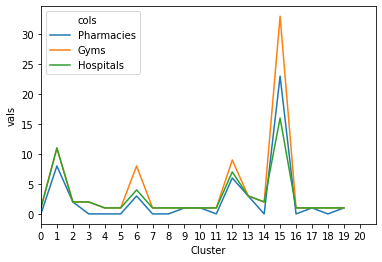

In [44]:
ax = sns.lineplot(data=df2, x="Cluster", y="vals", hue='cols',  markers=True, dashes=False)
ax.set_xlim(0,21)
ax.set_xticks(range(0,21))

In [45]:
int_df

,Cluster,Pharmacies,Gyms,Hospitals,Diff
0,0,0,1,1,2
1,1,8,11,11,14
2,2,2,2,2,2
3,3,0,2,2,4
4,4,0,1,1,2
5,5,0,1,1,2
6,6,3,8,4,9
7,7,0,1,1,2
8,8,0,1,1,2
9,9,1,1,1,1


Best diff score is obtained for cluster 15

In [48]:
cl15

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue,51th Most Common Venue,52th Most Common Venue,53th Most Common Venue,54th Most Common Venue,55th Most Common Venue,56th Most Common Venue,57th Most Common Venue,58th Most Common Venue,59th Most Common Venue,60th Most Common Venue,61th Most Common Venue,62th Most Common Venue,63th Most Common Venue,64th Most Common Venue,65th Most Common Venue,66th Most Common Venue,67th Most Common Venue,68th Most Common Venue,69th Most Common Venue,70th Most Common Venue,71th Most Common Venue,72th Most Common Venue,73th Most Common Venue,74th Most Common Venue,75th Most Common Venue,76th Most Common Venue,77th Most Common Venue,78th Most Common Venue,79th Most Common Venue,80th Most Common Venue,81th Most Common Venue,82th Most Common Venue,83th Most Common Venue,84th Most Common Venue,85th Most Common Venue,86th Most Common Venue,87th Most Common Venue,88th Most Common Venue,89th Most Common Venue,90th Most Common Venue,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
0,Bellavista,15,Tapas Restaurant,Restaurant,Hospital,Spanish Restaurant,Beer Garden,Bar,Lounge,Ice Cream Shop,Grocery Store,Asian Restaurant,Café,Pizza Place,Sandwich Place,Food,Fish Market,Food & Drink Shop,Flea Market,Winery,Fish & Chips Shop,French Restaurant,Farmers Market,Farm,Event Space,Electronics Store,Dive Bar,Diner,Fast Food Restaurant,Garden,Fried Chicken Joint,Furniture / Home Store,Historic Site,Halal Restaurant,Gymnastics Gym,Gym Pool,Gym / Fitness Center,Gym,Gourmet Shop,Golf Course,Gift Shop,General Entertainment,Gay Bar,Gastropub,Garden Center,Department Store,Gaming Cafe,Dessert Shop,Coffee Shop,Deli / Bodega,Cupcake Shop,Beer Store,Beer Bar,Bed & Breakfast,Basketball Court,Bakery,BBQ Joint,Athletics & Sports,Arts & Crafts Store,Art Museum,Art Gallery,Argentinian Restaurant,American Restaurant,Airport Terminal,Adult Boutique,Accessories Store,Bistro,Boarding House,Bookstore,Chinese Restaurant,Cosmetics Shop,Convenience Store,Construction & Landscaping,Cocktail Bar,Clothing Store,Church,Candy Store,Boutique,Camera Store,Cafeteria,Bus Station,Burger Joint,Brewery,Breakfast Spot,History Museum,Hotel Pool,Hostel,Record Shop,Seafood Restaurant,Science Museum,Salad Place,Roof Deck,Road,Rest Area,Rental Car Location,Pub,Hotel,Plaza,Platform,Pie Shop,Pharmacy,Peruvian Restaurant
1,Heliópolis,15,Tapas Restaurant,Spanish Restaurant,Hotel,Breakfast Spot,Seafood Restaurant,Sporting Goods Shop,Mediterranean Restaurant,Sandwich Place,Burger Joint,Basketball Court,Soccer Field,Soccer Stadium,Middle Eastern Restaurant,Rest Area,Hotel Pool,Dive Bar,Gym / Fitness Center,Restaurant,Fast Food Restaurant,Farmers Market,Fish & Chips Shop,Farm,Event Space

## **4. Discussion**

According to the presented results, the best cluster that could be considered for starting a new pharmaceutical business would be cluster 15.

As shown in the graph, this clusters keep the lowest number of pharmacies and at the same time, exhibit a large number of hospitals and gyms whose users require medical attendance. Hence, there is a need for this kind of business in the neighborhoods in this cluster. 


## **5. Conclusion**

The eighborhoods in the following list are appropriate for setting up a new pharmacy:

In [49]:
 cl15["Neighborhood"]

0                                    Bellavista
1                                    Heliópolis
2                         Elcano-Los Bermejales
4                 Pedro Salvador-Las Palmeritas
6                                     El Arenal
7                            Encarnación-Regina
8                                       Alfalfa
9                                 San Bartolomé
11                                      San Gil
12                                        Museo
13                               Santa Catalina
15                                   San Julián
18                                   Juan XXIII
32                                      Pío XII
34                                    El Carmen
35                         Cruz Roja-Capuchinos
40                               Polígono Norte
41                       La Paz-Las Golondrinas
42                   La Palmilla-Doctor Marañón
44                Macarena 3 Huertas-Macarena 5
46                                    El